### **Практическое задание на тему суперкомпьютеров с использованием технологии OpenMP: Отчёт.**


#### **[Оконишников Арий Ариевич, 321 группа]**


В настоящей работе была реализована параллельная версия алгоритма вычисления определителя матрицы приведением к верхнетреугольному виду. Сам алгоритм реализован в функции **double det(int N, int threadsNum)**.

In [ ]:
double det(int N, int threadsNum)
{
	omp_set_num_threads(threadsNum);
	int i,j,k;
	double **A, tmp;
    A = (double**)malloc(sizeof(double*)*N);
    for(int i = 0; i < N; i++) {
        A[i] = (double*)malloc(sizeof(double)*N);
    }
	srand(42);
	#pragma omp parallel
	#pragma for
	for (i = 0; i < N; i++ ) 
	{
		for (j = 0; j < N; j++ ) 
		{
			A[i][j] = (double)(rand()%10000)/((double)12000);
		}
	}

	double *L;
	L = (double*)malloc(sizeof(double)*N);
	for (i = 0; i < N; i++) 
	{ 	
		for (k = i; k < N; k++)
		{
			if (A[k][i] != 0)
			{
				for (j = 0; j < N; j++)
				{
					L[j] = A[k][j];
				}
				break;
			}
		}
		double *Weights;
		Weights = (double*)malloc(sizeof(double)*N);
		#pragma omp parallel for
		for (k = i+1; k < N; k++)
		{
			Weights[k] = A[k][i];
		}
    	//omp_set_num_threads(threadsNum);
		#pragma omp parallel for private(tmp, j)
		for (k = i+1; k < N; k++)
		{
			tmp = L[i] / Weights[k];
			if (A[k][i] != 0)
			{
				for (j = 0; j < N; j++) 
				{
					A[k][j] -= L[j] / tmp;
				}	
			}		
		}
	
	}

	double det=1;
	for (i = 0; i < N; i++) 
		det *= A[i][i];
	return det;
}

Функция получает на вход целое число **N** - размер матрицы, которая будет сгенерированна рандомно, но с учетом сида **srand(42);** **threadsNum** - это число потоков, которые будут задействованы в распараллеливании циклов **for**, а возвращает число - получившийся определитель.

Для каждого вызова функции высчитывается время нахождения управления внутри функции, т.е время выполнения. Она вызывается по три раза для каждого набора параметров, затем берется среднее из полученных отрезков времени для коррекциии возможных выбросов. 


In [ ]:
int main()
{
	int i, j, k;
	int N[5] = {100, 500, 1000, 2000, 5000};
	int threadsNum[6] = {40, 60, 80, 100, 120, 140};
	double start1, finish1, runing_t, res;

	for (i = 0; i < 5; i++) 
	{
		for (j = 0; j < 6; j++) 
		{
			runing_t = 0;
			for (k = 0; k < 3; k++)
			{
				start1 = omp_get_wtime();

				res = det(N[i], threadsNum[j]);

				finish1 = omp_get_wtime();
				runing_t += finish1-start1;
			}
			printf ("Size: %d, \t, Threads: %d, \tTime: %f s, \tResult: %f\n", N[i], threadsNum[j], runing_t/((double)3), res);
		}
	}
}

Полученные результаты, включая значение определятеля (для проверки на правильность выполнения) выводятся в отдельный файл log.txt, из которого затем *(вручную)* формируется датасет для визуализации времени выполнения программы.

**log.txt:**

      
      Size: 500, 	, Threads: 30, 	Time: 0.077608 s, 	Result: -111362502093081580696465357284349185141363634897860682081340490644453157477161850635769268008697701995163426412074897176298268911344098887448300193484020670589768438546239390998666552323643659310947053350472334322427970015973449055290417555491238851534389248.000000 
      Size: 500, 	, Threads: 60, 	Time: 0.083728 s, 	Result: -111362502093081580696465357284349185141363634897860682081340490644453157477161850635769268008697701995163426412074897176298268911344098887448300193484020670589768438546239390998666552323643659310947053350472334322427970015973449055290417555491238851534389248.000000
      Size: 500, 	, Threads: 90, 	Time: 0.126119 s, 	Result: -111362502093081580696465357284349185141363634897860682081340490644453157477161850635769268008697701995163426412074897176298268911344098887448300193484020670589768438546239390998666552323643659310947053350472334322427970015973449055290417555491238851534389248.000000
      Size: 500, 	, Threads: 120, 	Time: 0.179774 s, 	Result: -111362502093081580696465357284349185141363634897860682081340490644453157477161850635769268008697701995163426412074897176298268911344098887448300193484020670589768438546239390998666552323643659310947053350472334322427970015973449055290417555491238851534389248.000000
      Size: 500, 	, Threads: 150, 	Time: 0.096553 s, 	Result: -111362502093081580696465357284349185141363634897860682081340490644453157477161850635769268008697701995163426412074897176298268911344098887448300193484020670589768438546239390998666552323643659310947053350472334322427970015973449055290417555491238851534389248.000000
      Size: 1000, 	, Threads: 30, 	Time: 0.387747 s, 	Result: inf
      Size: 1000, 	, Threads: 60, 	Time: 0.409666 s, 	Result: inf
      Size: 1000, 	, Threads: 90, 	Time: 0.380450 s, 	Result: inf
      Size: 1000, 	, Threads: 120, 	Time: 0.442540 s, 	Result: inf
      Size: 1000, 	, Threads: 150, 	Time: 0.408269 s, 	Result: inf
      Size: 2000, 	, Threads: 30, 	Time: 3.226693 s, 	Result: inf
      Size: 2000, 	, Threads: 60, 	Time: 2.137864 s, 	Result: inf
      Size: 2000, 	, Threads: 90, 	Time: 2.360288 s, 	Result: inf
      Size: 2000, 	, Threads: 120, 	Time: 2.257971 s, 	Result: inf
      Size: 2000, 	, Threads: 150, 	Time: 1.988942 s, 	Result: inf
      Size: 5000, 	, Threads: 30, 	Time: 33.139135 s, 	Result: -inf
      Size: 5000, 	, Threads: 60, 	Time: 28.983375 s, 	Result: -inf
      Size: 5000, 	, Threads: 90, 	Time: 27.497188 s, 	Result: -inf
      Size: 5000, 	, Threads: 120, 	Time: 25.131187 s, 	Result: -inf
      Size: 5000, 	, Threads: 150, 	Time: 23.914559 s, 	Result: -inf


In [14]:
data

,Size,Thread,log_Time,real_Time
0,500,30,0.074744,0.077608
1,500,60,0.080407,0.083728
2,500,90,0.118777,0.126119
3,500,120,0.165323,0.179774
4,500,150,0.092172,0.096553
5,1000,30,0.327682,0.387747
6,1000,60,0.343353,0.409666
7,1000,90,0.322410,0.380450
8,1000,120,0.366405,0.442540
9,1000,150,0.342361,0.408269


В колонке **log_Time** содержутся логарифмы от времени выполнения программы, когда в **real_Time** неизмененное время.

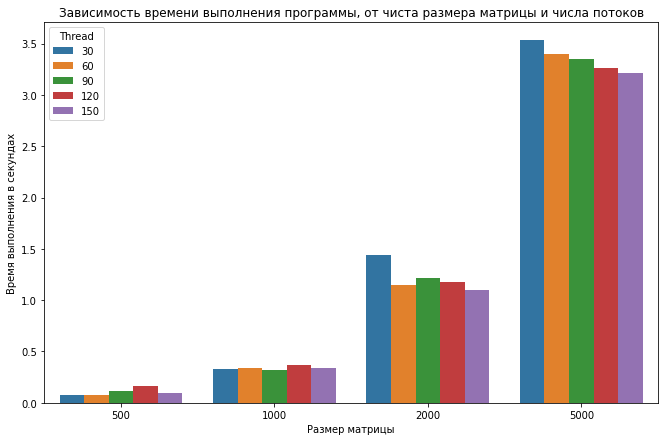

In [16]:
plt.figure(figsize=(11,7))
plt.title('Зависимость времени выполнения программы, от чиста размера матрицы и числа потоков')
sns.barplot(data=data, x="Size", hue="Thread", y="log_Time")
plt.xlabel('Размер матрицы')
plt.ylabel('Время выполнения в секундах')

plt.show()

Проведем анализ полученных результатов. Характерна ситуация, в которой при увеличении числа **threadsNum**, время всё же уменьшается, но при этом на небольших данных слегка увеличивается при определенном значении. Однако видно, что при увеличении выборки алгоритм сходится относительно увеличения числа потоков.

#### Рассмотрим основные проблемы недостаточной масштабируемости программы.

Параллельная часть программы включает в себя три прагмы **pragma omp parallel**. Однако большую часть времени занимает выполнения последнего блока for, в котором и реализуется приведение к верхнетреугольному виду. Сложность этого блока **О(n^3)**. 

С каждой итерацией последнего блока for, максимальное число нитей, которые могут быть задействованы в решении задачи уменьшается. Это естественно для поставленной задачи приведения матрицы к верхнетреугольному виду. На **m-ой** итерации цикла можно задействовать максимум **N-m-1** потоков (максимум, потому что в случае, если у матрицы много нулей на разных позициях, задействуем еще меньше потоков). **Выходит, с каждым задействованным потоком, всё меньше потоков будут работать эффективно.** Точно можно сказать, что использовать больше чем **N-1** потоков абсолютно бессмысленно и не даст увеличения по времени.

Подводя итог, отметим, что для решаемой задачи, вопрос об оптимальном выборе числа нитей неоднозначен и зависит от двух параметров:
1. Важность подной загрузки всех процессоров
2. Важность прироста скорости

Исходя из этих двух причин мы выбираем число используемых нитей **1 <= threadsNum <= N-1**.
